In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [371]:
df =pd.read_csv("annotated_points_np_200.csv")
data=np.array(df)


In [372]:
data[data == 2.0] = -1
data


array([[ 0.78629032, 15.03246753,  1.        ],
       [ 0.90725806, 14.9512987 ,  1.        ],
       [ 1.20967742, 13.97727273,  1.        ],
       [ 1.51209677, 13.57142857,  1.        ],
       [ 2.47983871, 12.43506494,  1.        ],
       [ 3.3266129 , 11.46103896,  1.        ],
       [ 3.62903226, 10.73051948,  1.        ],
       [ 5.14112903,  7.6461039 ,  1.        ],
       [ 5.50403226,  7.6461039 ,  1.        ],
       [ 5.50403226,  7.6461039 ,  1.        ],
       [ 6.35080645,  6.26623377,  1.        ],
       [ 7.0766129 ,  5.37337662,  1.        ],
       [ 7.0766129 ,  5.37337662,  1.        ],
       [ 7.9233871 ,  4.48051948,  1.        ],
       [ 8.70967742,  3.99350649,  1.        ],
       [ 8.9516129 ,  3.50649351,  1.        ],
       [ 9.73790323,  2.77597403,  1.        ],
       [10.16129032,  2.4512987 ,  1.        ],
       [10.8266129 ,  2.20779221,  1.        ],
       [11.6733871 ,  1.63961039,  1.        ],
       [12.45967742,  1.07142857,  1.   

In [373]:
coord_data=data[:,0:2]
y=data[:,2]
print(coord_data.shape)
print(y.shape)
print(data.shape)

(200, 2)
(200,)
(200, 3)


In [374]:
#perceptron
def perceptron(D,iter,y):
    W=np.array([0]*D.shape[1])
    W0=0
    for t in range(iter):
        changed=False
        for i in range(D.shape[0]):
            if y[i]*(np.dot(W,D[i])+W0)<=0:
                W=W+y[i]*D[i]
                W0=W0+y[i]
                changed=True
        if not changed:
            break
    return W0,W

In [375]:
#Bias and weights
W0,W=perceptron(coord_data,10000,y)
W= np.insert(W,0, W0)
W

array([226.        , -17.23790323,  12.02922078])

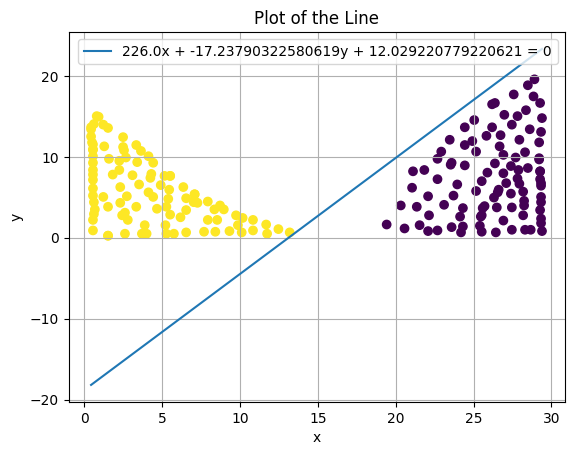

In [376]:
def plot_line(X,coefficients):
    a, b, c = coefficients

    x_values = np.linspace(min(X), max(X), 100)
    y_values = -( b * x_values + a) /c
    plt.scatter(coord_data[:, 0], coord_data[:, 1], c=y, cmap='viridis')
    plt.plot(x_values, y_values, label=f'{a}x + {b}y + {c} = 0')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of the Line')

    plt.grid(True)
    plt.legend()
    plt.show()

coefficients = W
plot_line(coord_data[:,0],coefficients)

In [377]:
#For random generated data
upper_limit = 15
random_matrix1 = np.random.uniform(low=0, high=upper_limit, size=(100, 2))

In [378]:
lower_limit = 20
upper_limit = 30
random_matrix2 = np.random.uniform(low=lower_limit, high=upper_limit, size=(100, 2))

In [379]:
coord_data2=np.concatenate((random_matrix1,random_matrix2),axis=0)
coord_data2[:,0]


array([ 3.6621832 ,  0.86109327,  0.25847603, 13.52694967,  0.80042484,
        5.89363034,  8.3576476 ,  7.54263893,  5.24251398,  4.31493088,
       13.00105642,  3.71415773,  9.72760546, 13.2307237 ,  9.33161977,
       10.94088213,  7.41248969,  9.75872572,  1.5023873 ,  8.18757808,
       13.93185103, 11.15483366, 11.99511972,  9.19790729,  5.07995438,
        9.51905941,  9.81673511, 11.99425915,  1.2527721 ,  6.27117003,
       13.3673353 ,  5.2402466 ,  9.29153892,  0.53107135,  9.78674311,
       11.85080335,  9.02468545, 12.81629989,  7.16963336,  6.64651741,
        4.860977  ,  4.08282249,  5.98586584,  1.67304102,  4.16647328,
        9.69520103,  7.08606476,  8.69005171,  8.97445404,  2.65451541,
        0.64631   ,  6.6774219 , 14.5038966 , 14.34883703, 14.08480356,
        8.23857979,  4.723169  ,  2.1998717 ,  9.21266189,  7.11879694,
        5.98275661,  1.60557086,  3.60619281,  6.60928883,  0.20033168,
        7.62943238,  1.49732471,  1.14930677,  8.72949633,  2.30

In [380]:
label=np.concatenate((np.ones(100),(-1)*np.ones(100)))
label

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [381]:
W2_0,W2=perceptron(coord_data2,10000,label)
W2= np.insert(W2,0, W2_0)
W2

array([118.        ,  -8.47687279,   1.58473191])

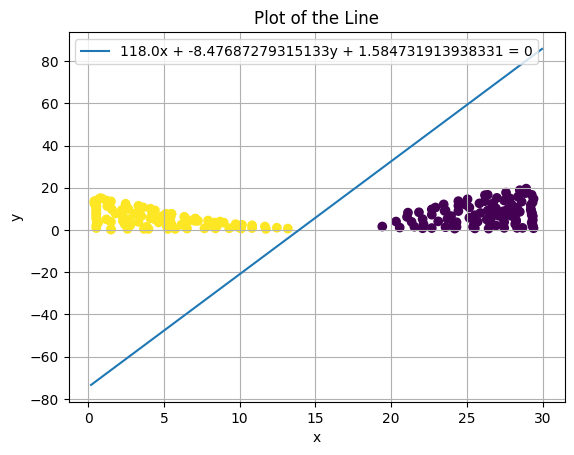

In [382]:

plot_line(coord_data2[:,0],W2)
